In [58]:
#Import libraries and create dataframes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from sklearn.linear_model import LinearRegression

from prophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")

df_0 = pd.read_csv("./data/data_set_2/clean_global_confirmed_cases_total.csv")
df_0.head()

,Date,Total_Cases,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/23/20,100,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,1/24/20,287,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/25/20,493,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/26/20,683,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/27/20,809,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Convert Date data so it can be considered in Linear Regression Modelling

df_0['Date'] = pd.to_datetime(df_0.date, format="%Y-%M-%D")
df_0['Date'] = df_0['Date'].map(datetime.datetime.toordinal)

In [77]:
#Linear Regression Code - set dataframe

y = np.asarray(df_0['value'])
X = df_0[['date']]
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.7,random_state=42)

model = LinearRegression() #create linear regression object
model.fit(X_train, y_train) #train model on train data
model.score(X_train, y_train) #check score

print ("Coefficient: \n", model.coef_)
print ("Intercept: \n", model.intercept)
coefs = zip(model.coef_, X.columns)
model.__dict__
print ("sl = %.1f + " % model.intercept_ + \
       " + " .join("1f %s" for coef in coefs)

In [78]:

print (‘Coefficient: \n’, model.coef_)
print (‘Intercept: \n’, model.intercept_) 
coefs = zip(model.coef_, X.columns)
model.__dict__
print "sl = %.1f + " % model.intercept_ + \
     " + ".join("%.1f %s" % coef for coef in coefs) #linear model

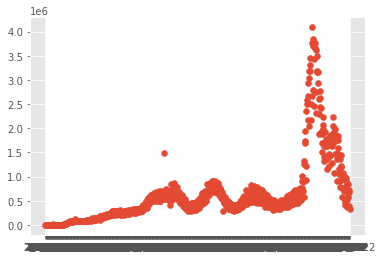

In [88]:
### BEGIN SOLUTION

plt.scatter(X, y)